In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print("Loading data...")
(input_train, Y_train), (input_test, Y_test) = imdb.load_data(
num_words = max_features)
print(len(input_train), "train sequences")
print(len(input_test), "test sequences")

print("Pad sequences (samples x time)")
input_train = sequence.pad_sequences(input_train, maxlen = maxlen)
input_test = sequence.pad_sequences(input_test, maxlen = maxlen)
print("input_train shape:", input_train.shape)
print("input_test shape:", input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [10]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = models.Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["acc"])
history = model.fit(input_train, Y_train,
                   epochs = 10,
                   batch_size = 128,
                   validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 13s 647us/step - loss: 0.5619 - acc: 0.7031 - val_loss: 0.3894 - val_acc: 0.8390
Epoch 2/10
20000/20000 [==============================] - 13s 641us/step - loss: 0.3569 - acc: 0.8518 - val_loss: 0.4022 - val_acc: 0.8208
Epoch 3/10
20000/20000 [==============================] - 13s 643us/step - loss: 0.2736 - acc: 0.8926 - val_loss: 0.3723 - val_acc: 0.8472
Epoch 4/10
20000/20000 [==============================] - 13s 651us/step - loss: 0.2181 - acc: 0.9181 - val_loss: 0.4106 - val_acc: 0.8510
Epoch 5/10
20000/20000 [==============================] - 13s 643us/step - loss: 0.1776 - acc: 0.9357 - val_loss: 0.4333 - val_acc: 0.8442
Epoch 6/10
20000/20000 [==============================] - 13s 641us/step - loss: 0.1326 - acc: 0.9530 - val_loss: 0.3829 - val_acc: 0.8574
Epoch 7/10
20000/20000 [==============================] - 13s 641us/step - loss: 0.0958 - acc: 0.9687 - val_loss: 0.5

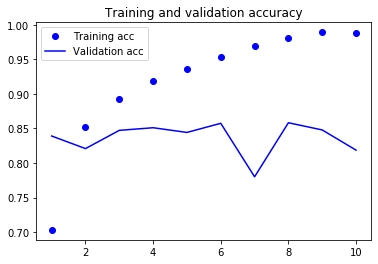

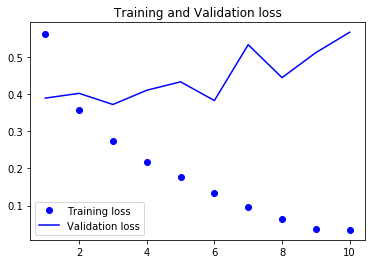

In [12]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and Validation loss")
plt.legend()

plt.show()